## Import library and setup environment

In [1]:
!conda install -c conda-forge googlemaps --yes
import googlemaps
from datetime import datetime

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests 
import json # library to handle JSON files

#import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - googlemaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    googlemaps-2.5.1           |             py_0          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         166 KB

The following NEW packages will be INSTALLED:

  googlemaps         conda-forge/noarch::googlemaps-2.5.1-py_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



certifi-2020.12.5    | 143 KB    | ##################################### | 100% 
googlemaps-2.5.1     | 23 KB     | ##################################### | 100% 
Preparing tr

In [2]:
#KEYS for API (Removed in the share notebook)
GOOGLE_CLIENT_KEY = ''

#setup foursquare API
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500



## Data preperation 1
1. Read school data file
2. Filter for required areas 
3. Briefly check on Sutton school data and plot a chart for all areas

In [3]:
#Read data file for school data
df_sch = pd.read_csv('School.csv', sep='\t', encoding = "utf-16le") #, dtype={'Sector':}
df_sch.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Selected,_,As at date,Deprivation,Phase,Provider type,Provision type,Remit,Sector,Constituency,Deprivation index,Does the inspection relate to the URN of the current school?,Epoch,Local authority area,OE number,Overall effectiveness,Pop filter,Postcode,Provider name,Published date,Region 9 name,URN,Learner numbers,Number of Records
0,Select for download,1,31 Aug 20,Least deprived,NaN,Children's Home,Children's home,Children's social care,Local Authority,High Peak,1,NaN,After Dorset Change,Derbyshire,1,Outstanding,True,ZZ99 3CZ,REDACTED,30 Sep 2020,East Midlands,SC065553,4.0,1
1,Select for download,1,31 Aug 20,Least deprived,NaN,Children's Home,Children's home,Children's social care,Local Authority,Newark,1,NaN,After Dorset Change,Nottinghamshire,1,Outstanding,True,ZZ99 3CZ,REDACTED,30 Sep 2020,East Midlands,SC036737,16.0,1
2,Select for download,1,31 Aug 20,Least deprived,NaN,Children's Home,Children's home,Children's social care,Local Authority,Westmorland and Lonsdale,1,NaN,After Dorset Change,Cumbria,1,Outstanding,True,ZZ99 3CZ,REDACTED,30 Sep 2020,North West,SC034158,4.0,1
3,Select for download,1,31 Aug 20,Least deprived,NaN,Children's Home,Children's home,Children's social care,Local Authority,Lancaster and Fleetwood,1,NaN,After Dorset Change,Lancashire,1,Outstanding,True,ZZ99 3CZ,REDACTED,30 Sep 2020,North West,SC035459,6.0,1
4,Select for download,1,31 Aug 20,Least deprived,NaN,Children's Home,Children's home,Children's social care,Local Authority,St Helens North,1,NaN,After Dorset Change,St Helens,1,Outstanding,True,ZZ99 3CZ,REDACTED,30 Sep 2020,North West,SC035971,4.0,1


In [4]:
df_sch.dtypes #check data types

Selected                                                         object
_                                                                 int64
As at date                                                       object
Deprivation                                                      object
Phase                                                            object
Provider type                                                    object
Provision type                                                   object
Remit                                                            object
Sector                                                           object
Constituency                                                     object
Deprivation index                                                 int64
Does the inspection relate to the URN of the current school?     object
Epoch                                                            object
Local authority area                                            

In [5]:
df_sch['Region 9 name'].value_counts() #Display regions of schools


South East                  12263
London                      10347
North West                   9361
East of England              8172
South West                   6999
West Midlands                6703
East Midlands                6131
Yorkshire and The Humber     4521
North East                   3111
Yorkshire and the Humber     2312
Not available                  12
Name: Region 9 name, dtype: int64

In [6]:
df_sch = df_sch[df_sch['Region 9 name']=='London'] #Only consider London for this analysis
df_sch = df_sch[df_sch['Provider name']!='REDACTED'] #Drop redacted data
cols = ['Local authority area','Overall effectiveness','Postcode','Provider name','Learner numbers']
df_sch = df_sch[cols] #Drop no needed columns
print('Local authority area\r\n', df_sch['Local authority area'].value_counts()) #Check what areas are included


Local authority area
 Croydon                   264
Barnet                    256
Bromley                   248
Wandsworth                219
Ealing                    212
Southwark                 208
Hackney                   205
Lambeth                   203
Enfield                   202
Lewisham                  201
Hillingdon                191
Havering                  190
Redbridge                 188
Brent                     186
Greenwich                 185
Tower Hamlets             183
Newham                    183
Haringey                  168
Hounslow                  165
Bexley                    164
Richmond upon Thames      161
Harrow                    158
Waltham Forest            156
Camden                    148
Islington                 139
Merton                    130
Hammersmith and Fulham    129
Sutton                    128
Westminster               127
Barking and Dagenham      122
Kensington and Chelsea    107
Kingston upon Thames       97
City of London    

In [7]:
df_sch.rename(columns={'Overall effectiveness':'Grade','Local authority area':'Area','Learner numbers':'Population'},inplace=True) #Rename columns


In [8]:
df_sch[df_sch['Area']=='Sutton'] #Display data of Sutton area

,Area,Grade,Postcode,Provider name,Population
233,Sutton,Good,CR4 4JP,Spencer Nursery School,72.00
1810,Sutton,Inadequate,CR0 4UL,Beddington Park Primary School,426.00
2881,Sutton,Outstanding,SM2 5QP,Chiltern Day Nursery,22.00
2882,Sutton,Outstanding,SM2 5PT,Play House Day Nursery,58.00
4371,Sutton,Good,KT4 8UT,Cheam Common Junior Academy,480.00
4390,Sutton,Good,KT17 2HQ,Nonsuch Primary School,238.00
4404,Sutton,Good,SM3 8DF,St Dunstan's Cheam CofE Primary School,459.00
6459,Sutton,Outstanding,SM6 7BT,Sutton Opportunity Pre-School,36.00
6460,Sutton,Outstanding,SM3 9BZ,Bright Horizons North Cheam Day Nursery and Pr...,80.00
7426,Sutton,Good,SM3 8AB,Nonsuch High School for Girls,1426.00


Text(0, 0.5, 'Borough')

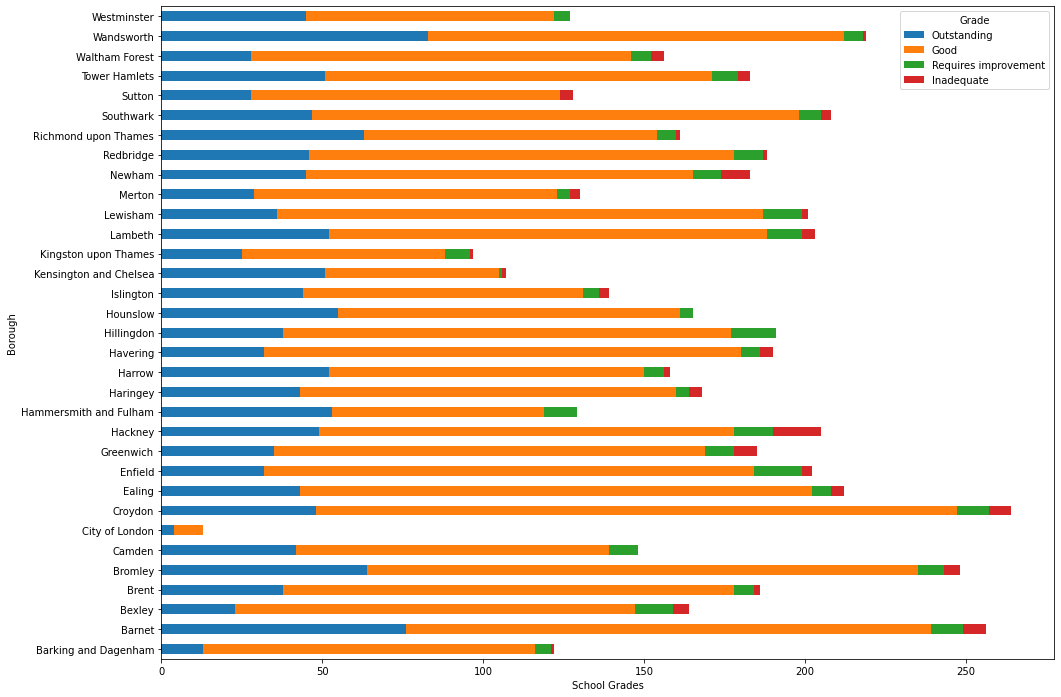

In [9]:
#Plot the distribution of schools grade in different areas
ax = df_sch.groupby(['Area','Grade'])['Area'].count().unstack('Grade').fillna(0)[['Outstanding','Good','Requires improvement','Inadequate']].plot.barh(stacked=True, figsize=(16,12))
ax.set_xlabel('School Grades')
ax.set_ylabel('Borough')

## Data Preperation (Cont.)
1. Read Crime data file and population data
2. Format the data and get the total crime

In [10]:
#Read data file for crime data
df_crime = pd.read_csv('WardCrime.csv', sep=',')
df_crime.head()

,MajorText,MinorText,WardName,WardCode,LookUp_BoroughName,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011
0,Arson and Criminal Damage,Arson,Abbey,E05000026,Barking and Dagenham,0,1,0,1,0,1,0,0,0,0,2,2,0,0,0,2,0,0,0,1,0,0,0,0
1,Arson and Criminal Damage,Criminal Damage,Abbey,E05000026,Barking and Dagenham,14,11,11,7,12,9,11,11,13,10,12,9,12,9,12,10,8,11,13,14,14,17,15,17
2,Burglary,Burglary - Business and Community,Abbey,E05000026,Barking and Dagenham,7,2,3,7,7,6,7,7,10,2,4,10,6,4,3,7,2,3,5,5,1,1,2,1
3,Burglary,Burglary - Residential,Abbey,E05000026,Barking and Dagenham,8,5,2,2,1,6,6,0,5,6,7,13,5,4,7,2,1,1,3,3,7,4,4,7
4,Drug Offences,Drug Trafficking,Abbey,E05000026,Barking and Dagenham,0,0,0,1,0,1,0,3,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0


In [11]:
#Read data file for population
df_lon_pop = pd.read_csv('ward-mid-year-estimates-sya-since-2002.csv', sep=',')
df_lon_pop.head()

,WD12CD,Year,WD12NM,LAD12NM,all_ages (persons),m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90plus,Unnamed: 96,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90plus,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215
0,E05009288,2002,Aldersgate,City of London,1571,7,2,4,4,5,1,0,3,1,1,1,4,1,6,4,0,3,3,1,0,3,0,0,7,16,20,13,15,19,16,23,25,21,12,16,19,20,10,16,19,16,12,9,13,16,15,10,10,7,14,15,40,21,8,31,20,16,16,21,12,13,8,7,9,13,6,5,3,1,4,10,11,6,7,10,9,6,5,6,3,3,4,4,1,1,1,4,1,2,1,4,NaN,3,3,6,6,3,0,1,1,4,1,4,1,4,0,3,0,0,1,4,3,4,6,19,7,17,12,17,17,22,18,26,19,18,15,8,9,19,10,17,7,17,9,7,7,10,1,14,13,7,10,16,15,24,15,23,15,15,7,12,8,4,7,4,4,5,9,15,7,12,16,9,6,3,3,11,4,6,12,0,0,3,1,9,3,2,0,1,1,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E05009288,2003,Aldersgate,City of London,1578,7,4,5,3,4,3,0,3,3,0,1,1,4,1,4,3,0,2,1,0,0,1,4,5,14,17,20,16,13,19,15,25,24,16,15,13,16,18,10,16,23,15,9,10,14,14,19,10,9,6,17,15,38,20,10,25,22,16,18,19,16,9,10,8,7,8,7,6,5,3,4,11,9,7,4,12,8,3,6,3,4,3,5,3,1,0,1,4,1,0,3,NaN,2,5,5,8,4,3,4,0,0,1,1,4,1,4,0,3,0,0,1,4,1,8,10,20,15,20,13,15,16,17,18,19,24,20,22,6,10,13,7,16,10,15,12,6,9,11,5,13,17,9,8,14,19,25,19,19,16,9,7,13,6,3,7,4,4,11,12,13,10,13,6,8,4,4,3,9,2,3,8,2,3,3,1,7,5,0,0,0,0,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E05009288,2004,Aldersgate,City of London,1559,3,6,4,4,3,4,4,2,3,3,2,1,1,4,0,3,3,0,0,4,0,2,0,7,5,17,12,22,18,14,19,14,15,23,12,17,16,17,21,7,13,20,17,11,10,11,10,20,10,10,6,19,17,32,20,7,21,24,18,18,24,16,8,9,10,6,9,6,6,3,1,4,8,9,6,8,12,8,4,4,3,6,4,4,4,2,1,1,2,1,2,NaN,5,2,2,2,6,5,3,4,1,0,2,2,4,0,3,0,2,0,0,0,7,5,11,14,25,13,19,21,12,15,16,17,16,23,17,16,6,14,13,5,19,6,14,12,6,10,14,6,16,18,10,6,14,15,21,19,20,16,7,4,7,6,1,8,4,11,14,9,13,10,9,9,6,3,2,6,9,2,6,9,3,2,3,1,5,1,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E05009288,2005,Aldersgate,City of London,1461,4,2,5,3,3,4,4,1,2,4,3,1,1,3,1,0,4,4,0,1,2,1,3,0,10,13,15,16,21,13,16,17,13,12,19,12,23,16,18,15,10,10,17,15,11,8,10,10,13,9,12,6,17,19,25,19,7,22,21,20,23,19,15,7,10,7,8,6,4,3,5,1,5,7,9,7,7,10,8,3,6,3,6,4,3,3,1,2,0,0,3,NaN,7,5,2,1,1,5,1,2,3,0,0,2,2,1,1,3,0,1,0,0,5,2,9,9,15,14,12,14,19,11,13,15,22,15,20,18,6,8,7,9,5,16,2,14,8,7,11,15,3,13,15,10,7,17,16,21,20,20,15,5,2,6,6,2,11,9,10,13,8,13,5,7,9,6,4,2,7,8,2,5,10,3,1,3,4,1,0,0,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E05009288,2006,Aldersgate,City of London,1474,3,2,3,5,4,4,3,4,2,2,4,1,1,0,1,2,0,3,6,0,1,3,2,7,0,10,13,18,19,26,14,12,8,3,15,23,13,22,12,18,14,11,9,17,14,11,11,11,13,13,10,13,8,20,20,22,22,7,22,21,20,22,19,15,6,7,6,8,7,3,2,4,0,4,7,10,8,4,10,9,5,5,2,5,4,2,1,2,2,1,4,NaN,8,5,3,2,1,1,4,3,2,5,2,0,1,0,0,0,2,1,1,0,0,3,2,8,20,6,14,17,19,26,13,15,15,21,13,21,9,14,10,8,10,7,15,6,13,9,11,11,11,4,14,13,10,10,17,15,21,17,19,11,2,1,4,2,1,16,12,9,14,8,6,3,8,7,6,5,2,5,8,3,5,10,4,2,

In [12]:
#get latest population year
df_lon_pop = df_lon_pop[df_lon_pop['Year']==df_lon_pop['Year'].max()]
df_lon_pop.head()

,WD12CD,Year,WD12NM,LAD12NM,all_ages (persons),m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90plus,Unnamed: 96,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90plus,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215
13,E05009288,2015,Aldersgate,City of London,2372,7,19,12,14,17,9,14,12,7,6,5,3,7,7,3,1,2,1,1,2,7,7,5,16,9,15,19,21,19,20,23,36,30,32,26,20,20,15,19,9,27,21,15,26,20,20,30,24,14,22,18,22,17,25,20,19,22,29,11,13,12,18,23,20,13,18,13,24,25,21,13,8,13,8,4,8,14,14,10,7,7,5,3,7,9,4,6,5,3,2,7,NaN,9,7,4,15,19,11,10,6,16,7,3,2,4,1,2,6,2,1,0,0,4,7,11,14,9,5,18,16,19,12,22,20,23,28,17,11,20,23,23,10,21,13,11,12,24,22,17,13,7,16,19,10,12,23,15,11,10,13,14,15,16,18,14,22,17,21,18,30,19,7,11,11,12,12,18,9,10,7,7,9,4,7,11,5,7,6,7,7,4,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,E05009292,2015,Bishopsgate,City of London,226,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,6,0,0,4,6,4,8,16,5,5,2,8,4,9,2,4,2,2,4,8,2,4,2,2,0,0,1,3,3,3,5,1,1,0,0,2,1,3,0,0,2,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,1,0,4,0,0,0,0,2,2,0,0,0,0,0,0,0,1,1,0,0,4,5,7,3,3,5,4,4,4,2,4,3,1,1,2,0,1,1,2,1,1,0,1,0,2,2,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,E05009302,2015,Cripplegate,City of London,2377,13,6,21,17,16,5,0,7,8,4,15,4,5,4,1,6,8,1,2,4,2,5,5,6,6,21,17,19,8,30,12,27,27,24,18,39,14,9,20,7,19,21,21,28,19,23,31,35,28,25,19,28,17,20,23,16,25,26,19,16,17,14,14,14,11,14,14,12,19,10,15,15,19,12,7,16,13,15,8,6,8,2,6,4,7,7,5,8,4,8,9,NaN,8,8,10,13,10,12,22,8,9,8,10,19,11,7,14,3,6,4,1,2,5,6,11,9,12,14,8,11,17,7,13,17,18,12,18,13,20,10,21,22,21,15,14,16,19,15,11,23,16,20,19,17,19,19,19,12,9,16,10,14,21,14,12,18,15,18,28,19,20,11,10,12,8,4,8,9,9,7,8,6,12,3,5,8,12,3,4,9,6,5,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,E05009304,2015,Farringdon Within,City of London,333,1,0,1,0,0,0,2,2,6,8,8,3,4,6,0,0,0,0,3,0,2,0,0,2,2,4,8,11,4,6,7,4,7,6,4,4,3,3,2,1,7,6,3,9,3,0,5,4,4,3,8,5,2,4,2,0,3,3,1,1,8,6,0,0,3,4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,0,1,1,3,3,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,2,0,10,0,2,1,4,5,3,3,2,4,4,1,3,3,1,2,2,2,2,4,0,1,0,4,0,2,3,4,0,0,2,0,4,0,1,2,1,1,6,0,2,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,E05009305,2015,Farringdon Without,City of London,1345,4,8,6,4,0,0,2,2,0,1,6,13,8,4,3,1,0,0,0,2,2,7,12,19,18,20,17,22,28,29,28,46,35,37,30,13,11,5,7,3,8,11,14,9,9,11,8,22,10,11,12,13,14,3,6,21,13,17,18,16,5,12,7,5,18,9,1,4,3,4,3,2,5,3,2,1,0,1,3,0,0,0,2,1,1,0,3,0,2,0,1,NaN,1,1,5,0,3,4,3,0,2,0,0,0,0,0,1,0,0,0,1,5,12,0,20,24,31,20,24,33,34,18,21,19,13,15,7,8,12,10,7,10,5,6,2,9,7,15,4,7,2,7,6,7,5,4,1,15,10,5,2,5,0,3,5,4,5,4,0,1,4,1,2,3,1,1,2,4,3,10,0,0,1,0,2,0,1,0,0,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [13]:
#Only need total
df_lon_pop.rename(columns={'WD12CD':'WardCode','WD12NM':'WardName','LAD12NM':'Area','all_ages (persons)':'WardPopulation'}, inplace = True)
df_lon_pop = df_lon_pop[['WardCode','WardName','Area','WardPopulation']]
df_lon_pop.head()

,WardCode,WardName,Area,WardPopulation
13,E05009288,Aldersgate,City of London,2372
27,E05009292,Bishopsgate,City of London,226
41,E05009302,Cripplegate,City of London,2377
55,E05009304,Farringdon Within,City of London,333
69,E05009305,Farringdon Without,City of London,1345


In [14]:
#Sum all the crime types
df_crime_group = df_crime.groupby('WardCode').sum()
df_crime_group.head()

,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011
WardCode,,,,,,,,,,,,,,,,,,,,,,,,
E05000026,221,214,225,216,246,266,226,259,238,237,261,259,239,252,235,275,160,222,233,236,233,235,244,259
E05000027,67,67,83,93,71,72,83,99,62,59,68,64,71,58,74,71,62,57,78,77,79,79,73,72
E05000028,94,83,83,67,100,88,108,92,79,83,90,72,86,93,94,98,85,90,98,71,78,86,81,76
E05000029,79,77,82,94,91,93,71,100,86,65,82,91,84,79,71,76,48,77,68,97,103,105,85,60
E05000030,57,63,72,86,80,72,72,70,50,69,81,81,62,68,63,90,50,43,67,58,61,63,72,73


In [15]:
#calculate the total crime
df_crime_group['TotalCrime'] = df_crime_group.sum(axis=1)
df_crime_group.head()

,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,TotalCrime
WardCode,,,,,,,,,,,,,,,,,,,,,,,,,
E05000026,221,214,225,216,246,266,226,259,238,237,261,259,239,252,235,275,160,222,233,236,233,235,244,259,5691
E05000027,67,67,83,93,71,72,83,99,62,59,68,64,71,58,74,71,62,57,78,77,79,79,73,72,1739
E05000028,94,83,83,67,100,88,108,92,79,83,90,72,86,93,94,98,85,90,98,71,78,86,81,76,2075
E05000029,79,77,82,94,91,93,71,100,86,65,82,91,84,79,71,76,48,77,68,97,103,105,85,60,1964
E05000030,57,63,72,86,80,72,72,70,50,69,81,81,62,68,63,90,50,43,67,58,61,63,72,73,1623


In [16]:
#only require the total count column
df_crime_group.drop(df_crime_group.columns[0:-1], axis=1, inplace=True)
df_crime_group.head()

,TotalCrime
WardCode,
E05000026,5691
E05000027,1739
E05000028,2075
E05000029,1964
E05000030,1623


In [17]:
#Formatting the data
df_crime_group.reset_index(inplace = True)
df_crime_group.head()

,WardCode,TotalCrime
0,E05000026,5691
1,E05000027,1739
2,E05000028,2075
3,E05000029,1964
4,E05000030,1623


In [18]:
df_crime_group = df_crime_group.merge(df_lon_pop, on='WardCode')
df_crime_group.head()

,WardCode,TotalCrime,WardName,Area,WardPopulation
0,E05000026,5691,Abbey,Barking and Dagenham,14179
1,E05000027,1739,Alibon,Barking and Dagenham,11007
2,E05000028,2075,Becontree,Barking and Dagenham,13687
3,E05000029,1964,Chadwell Heath,Barking and Dagenham,10769
4,E05000030,1623,Eastbrook,Barking and Dagenham,11255


In [19]:
df_crime_group[df_crime_group['WardPopulation'].isna()] #Check any record cannot merge

,WardCode,TotalCrime,WardName,Area,WardPopulation


In [20]:
df_crime_group['CrimeRate'] = np.round(df_crime_group['TotalCrime'] / df_crime_group['WardPopulation'] *100,2)
df_crime_group.head()

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate
0,E05000026,5691,Abbey,Barking and Dagenham,14179,40.14
1,E05000027,1739,Alibon,Barking and Dagenham,11007,15.80
2,E05000028,2075,Becontree,Barking and Dagenham,13687,15.16
3,E05000029,1964,Chadwell Heath,Barking and Dagenham,10769,18.24
4,E05000030,1623,Eastbrook,Barking and Dagenham,11255,14.42


## Data Check
Check if any school area cannot find found and handle it

In [21]:
#Check if any area with no crime data
df_sch[~df_sch['Area'].isin(df_crime['LookUp_BoroughName'])]

,Area,Grade,Postcode,Provider name,Population
2820,City of London,Outstanding,EC2Y 8AX,Barbican Playgroup,20.0
2821,City of London,Outstanding,EC2Y 8DU,Newpark Childcare Centre,26.0
21062,City of London,Outstanding,EC3N 2ET,David Game College,239.0
24194,City of London,Good,EC2Y 8AH,City Child Nursery,54.0
24195,City of London,Good,EC3A 5DE,Cass Child & Family Centre,76.0
24196,City of London,Good,EC1A 9HY,Smithfield House Children's Nursery,100.0
30746,City of London,Good,EC4A 1EN,Capita PLC,4289.0
30747,City of London,Good,EC1A 2AT,British Academy of Jewellery,50.0
30771,City of London,Good,EC3N 1DD,Skills Team Ltd,1106.0
30772,City of London,Good,EC2P 2EJ,Train'd Up Railway Resourcing Limited,384.0


In [22]:
#Oops City Of London is not managed by Metropolian Police 
#Drop the data ... anyway no plan to live in City of London
df_sch = df_sch[df_sch['Area'].isin(df_crime['LookUp_BoroughName'])]
df_sch[~df_sch['Area'].isin(df_crime['LookUp_BoroughName'])]

,Area,Grade,Postcode,Provider name,Population


## Data processing
1. Calculate the % of outstanding school by population
2. Calculate the % of crime vs total population
3. Merge the two data set
4. Plot a bar chart to see the data.

In [23]:
df_sch.head()

,Area,Grade,Postcode,Provider name,Population
213,Brent,Good,NW10 8RF,Fawood Children's Centre,87.0
214,Brent,Good,NW10 9SD,Curzon Crescent Nursery School,140.0
215,Brent,Good,NW6 5RA,Granville Plus Nursery School,105.0
216,Croydon,Good,SE25 5BD,Crosfield Nursery School,121.0
217,Croydon,Good,CR7 8RS,Thornton Heath Nursery School,135.0


In [24]:
df_sch_pop = df_sch.groupby(['Area']).sum()
df_sch_pop.head()

,Population
Area,
Barking and Dagenham,58867.00
Barnet,82685.44
Bexley,52221.00
Brent,55590.00
Bromley,79514.00


In [25]:
df_pop_os = df_sch[df_sch['Grade']=='Outstanding'].groupby(['Area']).sum()
df_pop_os.rename(columns={"Population":"Outstanding"},inplace=True)
df_pop_os.head()

,Outstanding
Area,
Barking and Dagenham,5414.00
Barnet,24455.48
Bexley,8297.00
Brent,13633.00
Bromley,18497.00


In [26]:
df_sch_pop['Outstanding'] = df_pop_os['Outstanding']
df_sch_pop.head()

,Population,Outstanding
Area,,
Barking and Dagenham,58867.00,5414.00
Barnet,82685.44,24455.48
Bexley,52221.00,8297.00
Brent,55590.00,13633.00
Bromley,79514.00,18497.00


In [27]:
df_sch_pop['Outstanding_percentage'] = np.round(df_sch_pop['Outstanding'] / df_sch_pop['Population'] * 100 , 2)
df_sch_pop.head()

,Population,Outstanding,Outstanding_percentage
Area,,,
Barking and Dagenham,58867.00,5414.00,9.20
Barnet,82685.44,24455.48,29.58
Bexley,52221.00,8297.00,15.89
Brent,55590.00,13633.00,24.52
Bromley,79514.00,18497.00,23.26


## Explore the % of outstanding by each borough

Text(0, 0.5, 'Borough')

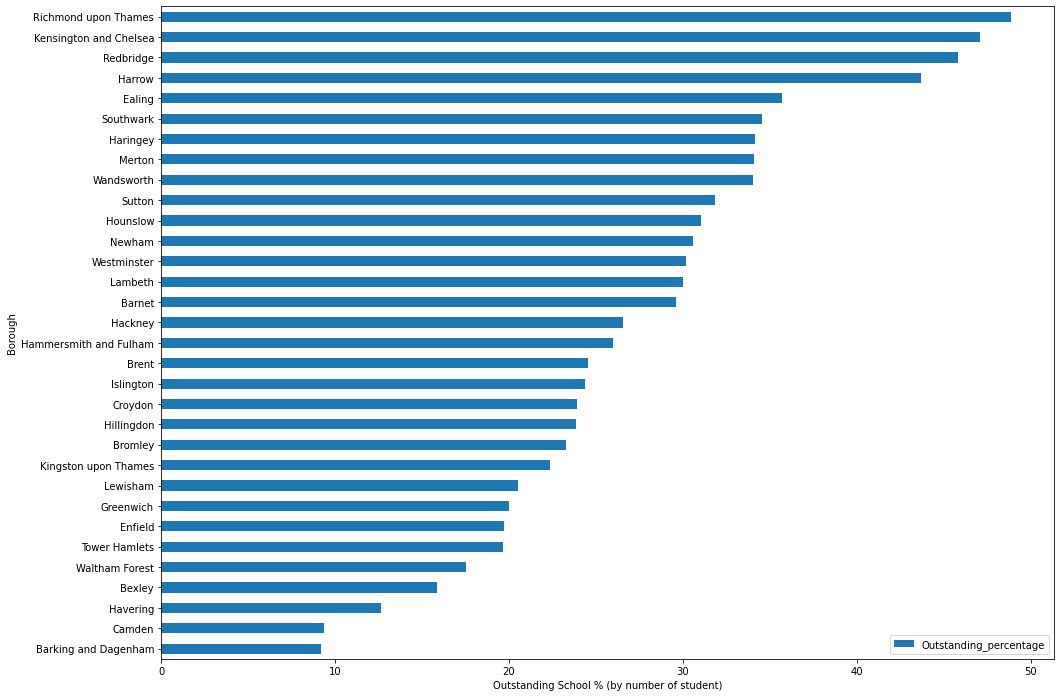

In [28]:
#Plot the distribution of schools grade in different areas
ax = df_sch_pop.sort_values('Outstanding_percentage').plot.barh(y='Outstanding_percentage', figsize=(16,12))
ax.set_xlabel('Outstanding School % (by number of student)')
ax.set_ylabel('Borough')

In [29]:
#merge crime data with school data
df_merged = df_crime_group.merge(df_sch_pop, on='Area')
df_merged.head()

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage
0,E05000026,5691,Abbey,Barking and Dagenham,14179,40.14,58867.0,5414.0,9.2
1,E05000027,1739,Alibon,Barking and Dagenham,11007,15.80,58867.0,5414.0,9.2
2,E05000028,2075,Becontree,Barking and Dagenham,13687,15.16,58867.0,5414.0,9.2
3,E05000029,1964,Chadwell Heath,Barking and Dagenham,10769,18.24,58867.0,5414.0,9.2
4,E05000030,1623,Eastbrook,Barking and Dagenham,11255,14.42,58867.0,5414.0,9.2


In [30]:
df_merged[df_merged['Outstanding'].isna()] #check cannot record cannot merge

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage


In [31]:
df_merged.shape

(542, 9)

Text(0, 0.5, 'Ward')

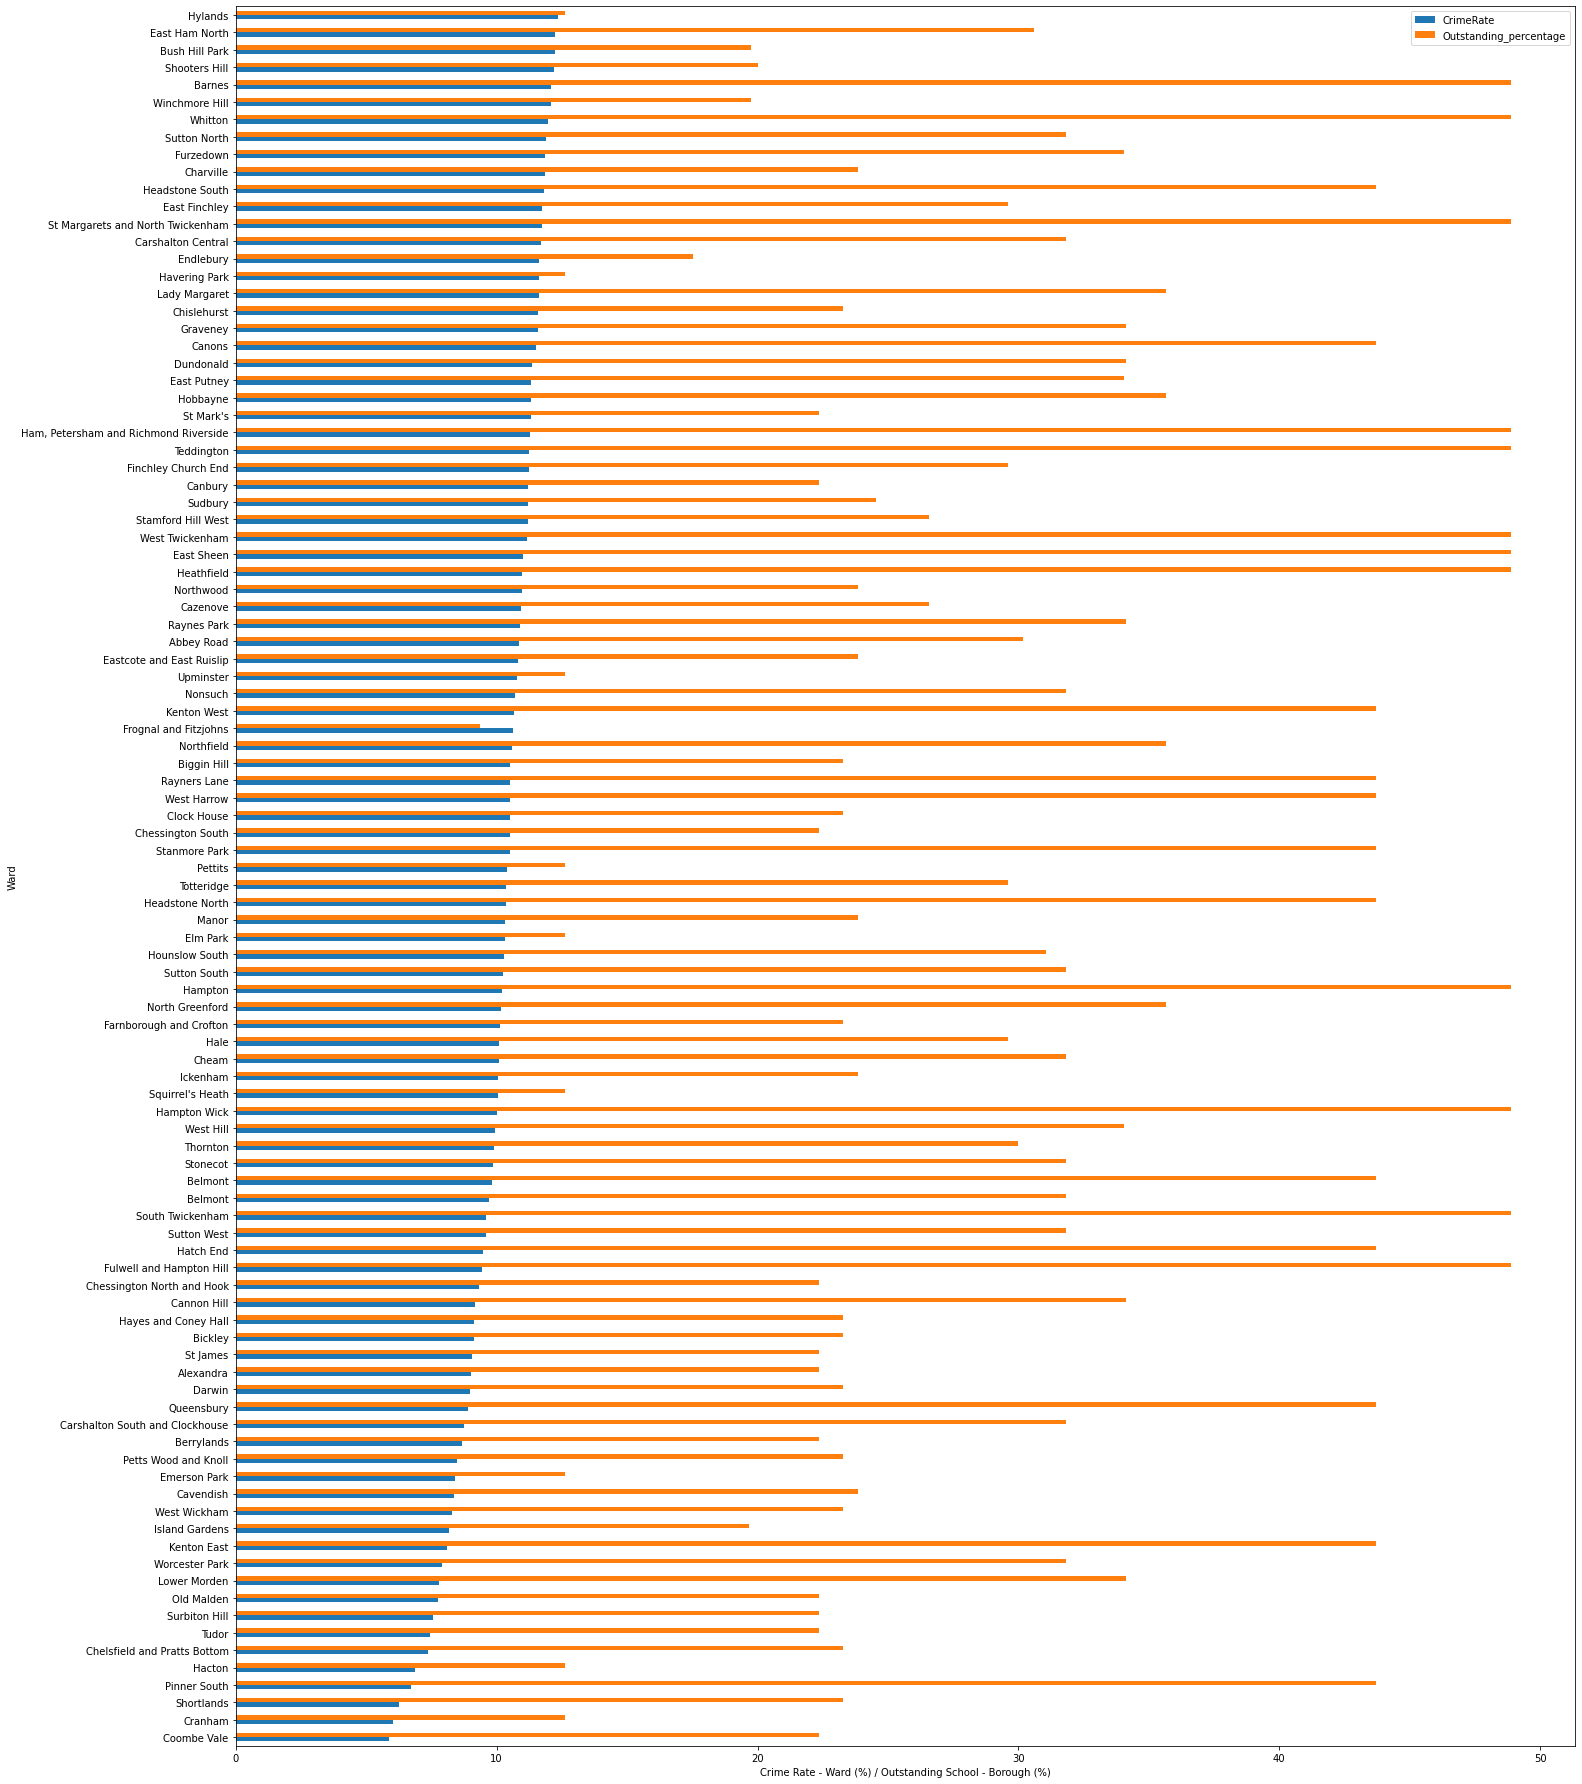

In [32]:
#Show top 100 records with lowest crime rate
ax = df_merged.sort_values(by='CrimeRate').head(100).plot.barh(x='WardName',y=['CrimeRate','Outstanding_percentage'], figsize=(24,32))
ax.set_xlabel('Crime Rate - Ward (%) / Outstanding School - Borough (%)')
ax.set_ylabel('Ward')

<AxesSubplot:xlabel='CrimeRate', ylabel='Outstanding_percentage'>

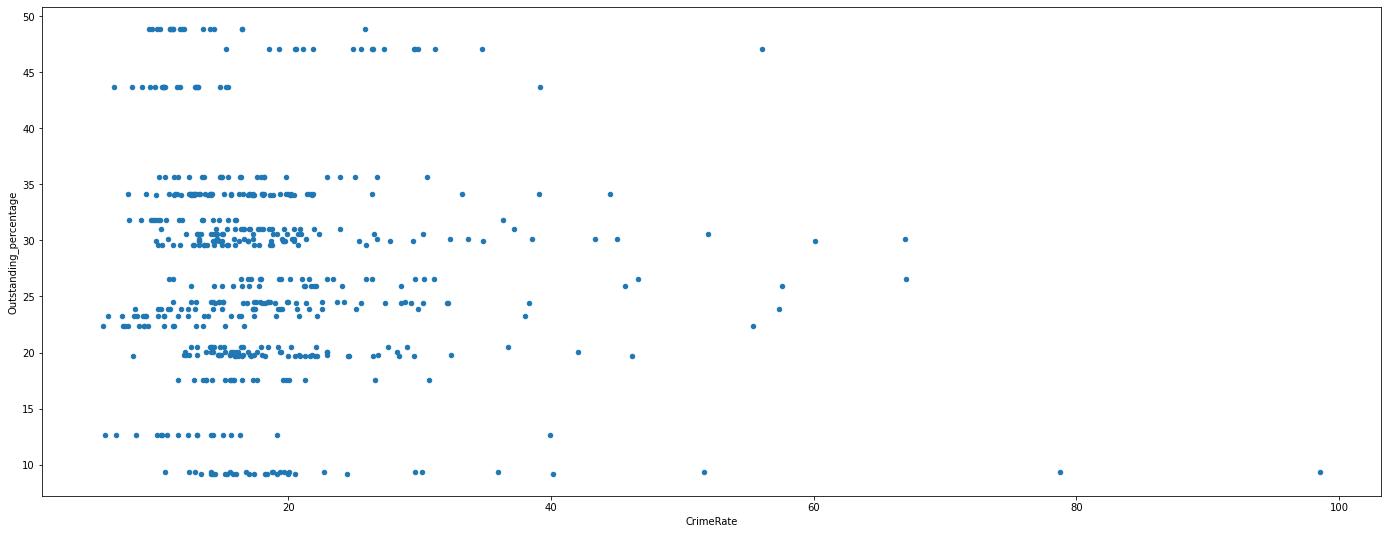

In [33]:
df_merged[df_merged['CrimeRate']<100].plot.scatter(x='CrimeRate',y='Outstanding_percentage', figsize=(24,9))

## Get Location of Ward and estimate travel time to Canary Wharf during weekday morning by train/rail

In [34]:
USE_API = False;

wardList=[]
gmaps = googlemaps.Client(key=GOOGLE_CLIENT_KEY)
startTime = datetime(2021, 1, 4, 8,0,0,0) #departure set as a weekday 8am.

if USE_API:
    for name,area,code in zip(df_merged['WardName'],df_merged['Area'],df_merged['WardCode']):
        try:               
            geocode_result = gmaps.geocode(name + ' in ' + area, components={'postal_town':'London','country':'GB'}) #Get location, ps add London to get the correct location only in london

            result = json_normalize(geocode_result).iloc[[0]]    

            directions_result = gmaps.directions(origin=[result['geometry.location.lat'][0],result['geometry.location.lng'][0]],
                                             destination="canary wharf london",
                                             mode="transit",
                                             transit_mode ="rail",
                                             departure_time = startTime
                                             )   
            wardList.append([(
                code, 
                result['geometry.location.lat'][0], 
                result['geometry.location.lng'][0],
                json_normalize(json_normalize(directions_result)['legs'][0])['duration.value'][0])])

        except:
            print('Ward:{} Area:{} Direction:{} Location:{}'.format(name, area, len(directions_result), len(geocode_result)) )    

    

In [35]:
if USE_API:
    wardLoc = pd.DataFrame([item for wardList in wardList for item in wardList])
    wardLoc.columns = ['WardCode','Latitude', 
                      'Longitude', 
                      'TravelSecond'
                      ]
else:
    wardLoc = pd.read_csv('google_ward_result.csv')
    wardLoc = wardLoc[['WardCode','Latitude', 
                      'Longitude', 
                      'TravelSecond']]

In [36]:
wardLoc[wardLoc['TravelSecond'].isna()]

,WardCode,Latitude,Longitude,TravelSecond


In [37]:
wardLoc.shape

(542, 4)

In [38]:
df_merged = df_merged.merge(wardLoc, on='WardCode')

In [39]:
df_merged.head()

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond
0,E05000026,5691,Abbey,Barking and Dagenham,14179,40.14,58867.0,5414.0,9.2,51.543674,0.102531,2858
1,E05000027,1739,Alibon,Barking and Dagenham,11007,15.80,58867.0,5414.0,9.2,51.547616,0.151888,3062
2,E05000028,2075,Becontree,Barking and Dagenham,13687,15.16,58867.0,5414.0,9.2,51.562598,0.122430,3471
3,E05000029,1964,Chadwell Heath,Barking and Dagenham,10769,18.24,58867.0,5414.0,9.2,51.572228,0.141995,3500
4,E05000030,1623,Eastbrook,Barking and Dagenham,11255,14.42,58867.0,5414.0,9.2,51.551440,0.163567,3197


In [40]:
## Try plot the map of sutton with crime rate as bubble size
df_sutton = df_merged[df_merged['Area']=='Sutton']
map_clusters = folium.Map(location=[df_sutton.mean()['Latitude'],df_sutton.mean()['Longitude']], zoom_start=13)

for lat, lon, ward, crime in zip(df_sutton['Latitude'], df_sutton['Longitude'], df_sutton['WardName'], df_sutton['CrimeRate']):
    label = folium.Popup('{} : {}'.format(ward,crime))
    folium.CircleMarker(
        [lat, lon],
        radius=crime/4,
        popup=label, fill=True,
        color='#0000ff',
        fill_color='#0000ff',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Get the numbers of Nightlife places, Japanese and Korean restaurants and Coffee shop need the location

In [41]:
#Get number of venues in concern from foursquare
venueList = []

NIGHTLIFE='4d4b7105d754a06376d81259'
RESTAURANT='4bf58dd8d48988d111941735' #JAPANESE
COFFEE='4bf58dd8d48988d1e0931735' #COFFEE SHOP

if USE_API:
    for lat, lon, ward in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['WardCode']):

        try:
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lon, 
                radius, 
                LIMIT,
                NIGHTLIFE)

            numNightlife = requests.get(url).json()["response"]['totalResults']

            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lon, 
                radius, 
                LIMIT,
                RESTAURANT)

            numRest = requests.get(url).json()["response"]['totalResults']

            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lon, 
                radius, 
                LIMIT,
                COFFEE)

            numCoffee = requests.get(url).json()["response"]['totalResults']

            venueList.append([(
                ward, numNightlife, numRest, numCoffee)])

        except:
            print("err {}".format(ward))

    

In [42]:
if USE_API:
    dfVenue = pd.DataFrame([item for venueList in venueList for item in venueList])
    dfVenue.columns = ['WardCode','Nightlife', 
                      'Restaurant', 
                      'Coffee']
    
else:
    dfVenue = pd.read_csv('foursquare_result.csv')
    dfVenue = dfVenue[['WardCode','Nightlife', 
                      'Restaurant', 
                      'Coffee']]
    
dfVenue.shape

(542, 4)

In [43]:
dfVenue.head()

,WardCode,Nightlife,Restaurant,Coffee
0,E05000371,6,2,11
1,E05000380,32,5,22
2,E05000026,0,0,1
3,E05000027,1,0,0
4,E05000028,1,0,2


In [44]:
df_merged = df_merged.merge(dfVenue, on='WardCode')
df_merged.head()

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond,Nightlife,Restaurant,Coffee
0,E05000026,5691,Abbey,Barking and Dagenham,14179,40.14,58867.0,5414.0,9.2,51.543674,0.102531,2858,0,0,1
1,E05000027,1739,Alibon,Barking and Dagenham,11007,15.80,58867.0,5414.0,9.2,51.547616,0.151888,3062,1,0,0
2,E05000028,2075,Becontree,Barking and Dagenham,13687,15.16,58867.0,5414.0,9.2,51.562598,0.122430,3471,1,0,2
3,E05000029,1964,Chadwell Heath,Barking and Dagenham,10769,18.24,58867.0,5414.0,9.2,51.572228,0.141995,3500,2,0,0
4,E05000030,1623,Eastbrook,Barking and Dagenham,11255,14.42,58867.0,5414.0,9.2,51.551440,0.163567,3197,1,0,0


In [45]:
df_merged.shape

(542, 15)

# Preprocessing data
1. Cut only required data
2. Standardize the values before processing

In [46]:
df_merged.reset_index(drop=True, inplace=True)

In [47]:
df_4ML = df_merged[['CrimeRate','Outstanding_percentage','TravelSecond','Nightlife','Restaurant','Coffee']] #Create dataframe for machine learning
df_4ML.head()

,CrimeRate,Outstanding_percentage,TravelSecond,Nightlife,Restaurant,Coffee
0,40.14,9.2,2858,0,0,1
1,15.80,9.2,3062,1,0,0
2,15.16,9.2,3471,1,0,2
3,18.24,9.2,3500,2,0,0
4,14.42,9.2,3197,1,0,0


In [48]:
df_4ML.shape

(542, 6)

In [49]:
from sklearn.preprocessing import StandardScaler
X = df_4ML.values[:,:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.9942901 , -1.90458912, -0.37445219, -0.70020712, -0.33218262,
        -0.54063245],
       [-0.19244876, -1.90458912, -0.20453821, -0.57880204, -0.33218262,
        -0.6450969 ],
       [-0.22365307, -1.90458912,  0.13612266, -0.57880204, -0.33218262,
        -0.43616799],
       ...,
       [ 0.48234441,  2.06600885, -0.89335615,  0.02822332,  0.15906698,
        -0.01831019],
       [ 0.06888733,  2.06600885, -0.25451291, -0.3359919 , -0.33218262,
        -0.54063245],
       [ 0.28390451,  2.06600885, -0.76258902,  1.72789434,  1.6328158 ,
         2.48883664]])

In [50]:
df_4ML.describe()

,CrimeRate,Outstanding_percentage,TravelSecond,Nightlife,Restaurant,Coffee
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,19.747122,27.360424,3307.570111,5.767528,1.352399,6.175277
std,20.528935,9.543896,1201.716624,8.244497,4.075011,9.581478
min,5.880000,9.200000,0.000000,0.000000,0.000000,0.000000
25%,13.157500,20.520000,2579.500000,1.000000,0.000000,1.000000
50%,16.440000,26.570000,3316.500000,4.000000,0.000000,4.000000
75%,20.665000,34.040000,3958.000000,6.000000,2.000000,7.000000
max,332.390000,48.880000,19393.000000,87.000000,73.000000,124.000000


In [51]:
K = range(5,15) 
inertias = [] 

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Clus_dataSet) 
    kmeanModel.fit(Clus_dataSet)     
      
    inertias.append(kmeanModel.inertia_) 


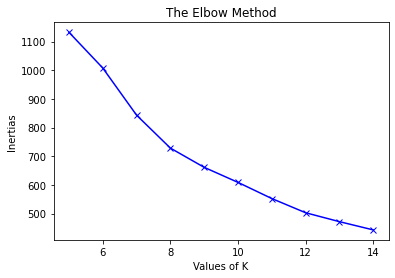

In [52]:
import matplotlib.pyplot as plt      
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertias') 
plt.title('The Elbow Method') 
plt.show() 

In [53]:

kclusters=8
kmeanModel = KMeans(n_clusters=kclusters)
kmeanModel.fit(Clus_dataSet) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
# add clustering labels
df_merged['Cluster']= kmeanModel.labels_

df_merged.head() 

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond,Nightlife,Restaurant,Coffee,Cluster
0,E05000026,5691,Abbey,Barking and Dagenham,14179,40.14,58867.0,5414.0,9.2,51.543674,0.102531,2858,0,0,1,5
1,E05000027,1739,Alibon,Barking and Dagenham,11007,15.80,58867.0,5414.0,9.2,51.547616,0.151888,3062,1,0,0,5
2,E05000028,2075,Becontree,Barking and Dagenham,13687,15.16,58867.0,5414.0,9.2,51.562598,0.122430,3471,1,0,2,5
3,E05000029,1964,Chadwell Heath,Barking and Dagenham,10769,18.24,58867.0,5414.0,9.2,51.572228,0.141995,3500,2,0,0,5
4,E05000030,1623,Eastbrook,Barking and Dagenham,11255,14.42,58867.0,5414.0,9.2,51.551440,0.163567,3197,1,0,0,5


In [55]:
df_merged.head() 

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond,Nightlife,Restaurant,Coffee,Cluster
0,E05000026,5691,Abbey,Barking and Dagenham,14179,40.14,58867.0,5414.0,9.2,51.543674,0.102531,2858,0,0,1,5
1,E05000027,1739,Alibon,Barking and Dagenham,11007,15.80,58867.0,5414.0,9.2,51.547616,0.151888,3062,1,0,0,5
2,E05000028,2075,Becontree,Barking and Dagenham,13687,15.16,58867.0,5414.0,9.2,51.562598,0.122430,3471,1,0,2,5
3,E05000029,1964,Chadwell Heath,Barking and Dagenham,10769,18.24,58867.0,5414.0,9.2,51.572228,0.141995,3500,2,0,0,5
4,E05000030,1623,Eastbrook,Barking and Dagenham,11255,14.42,58867.0,5414.0,9.2,51.551440,0.163567,3197,1,0,0,5


In [56]:
df_merged.groupby(['Cluster']).mean().sort_values(['TravelSecond'])

,TotalCrime,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond,Nightlife,Restaurant,Coffee
Cluster,,,,,,,,,,,,
2,40266.000000,12114.000000,332.390000,54511.000000,16440.000000,30.160000,51.511841,-0.127104,1674.000000,87.000000,73.000000,124.000000
6,33173.000000,11052.000000,300.150000,54511.000000,16440.000000,30.160000,51.506993,-0.136060,1712.000000,34.000000,23.000000,55.000000
4,5717.250000,13133.900000,44.676000,64674.674000,12779.250000,22.337000,51.517715,-0.120254,1908.650000,31.450000,10.300000,34.050000
1,3037.041667,15149.840278,19.786806,65058.929722,15448.700833,23.952361,51.511813,-0.071939,2436.347222,4.868056,1.020833,5.395833
3,2895.278689,12399.131148,23.415410,46933.508197,14597.245902,32.918197,51.494374,-0.164695,2593.196721,15.540984,3.459016,15.327869
5,2217.395973,13673.154362,15.841879,60448.194362,11586.480268,19.062685,51.532865,-0.088660,3875.067114,1.899329,0.107383,2.140940
0,2053.424242,13144.860606,15.306364,51906.097455,18411.704000,36.307212,51.497135,-0.253282,3911.193939,2.684848,0.345455,2.763636
7,1075.000000,8116.000000,13.250000,35598.000000,12142.000000,34.110000,50.889660,-4.094900,19393.000000,1.000000,0.000000,0.000000


In [62]:
import html

# create map
map_clusters = folium.Map(location=[df_merged['Latitude'].mean(),df_merged['Longitude'].mean()], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, code, cluster, ward, area in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['WardCode'], df_merged['Cluster'], df_merged['WardName'], df_merged['Area']):
    label = folium.Popup(area + ' ' + ward, parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [65]:
df_merged.groupby(['Cluster']).count()[['WardCode']]

,WardCode
Cluster,
0,165
1,144
2,1
3,61
4,20
5,149
6,1
7,1


<AxesSubplot:ylabel='Cluster'>

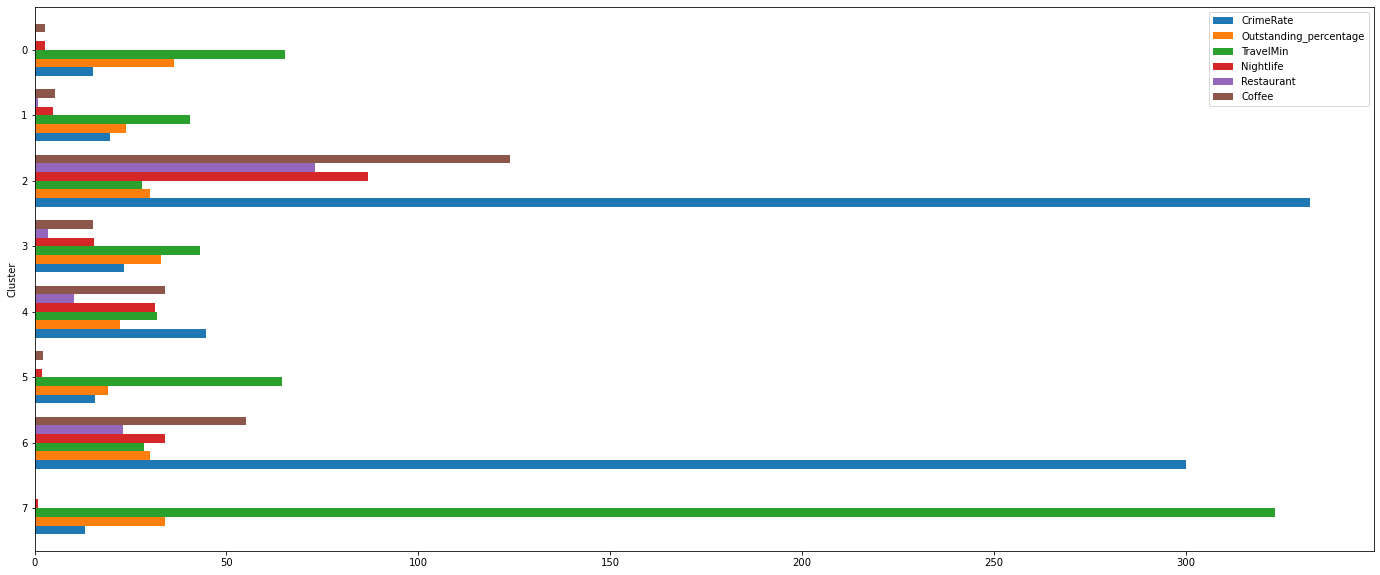

In [68]:
df_plot = df_merged.groupby(['Cluster']).mean().sort_values(['Cluster'] ,ascending = False)
df_plot['TravelMin']=df_plot['TravelSecond'] / 60
df_plot.plot.barh(y=['CrimeRate','Outstanding_percentage','TravelMin','Nightlife','Restaurant','Coffee'], figsize=(24,10), width=0.8)

In [71]:
df_merged[df_merged['Cluster'].isin([2,6,7])]

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond,Nightlife,Restaurant,Coffee,Cluster
364,E05000472,1075,Village,Merton,8116,13.25,35598.0,12142.0,34.11,50.889660,-4.094900,19393,1,0,0,7
477,E05000644,33173,St James's,Westminster,11052,300.15,54511.0,16440.0,30.16,51.506993,-0.136060,1712,34,23,55,6
482,E05000649,40266,West End,Westminster,12114,332.39,54511.0,16440.0,30.16,51.511841,-0.127104,1674,87,73,124,2


In [72]:
df_merged[df_merged['WardName']=='Sutton South']

,WardCode,TotalCrime,WardName,Area,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond,Nightlife,Restaurant,Coffee,Cluster
416,E05000566,1068,Sutton South,Sutton,10420,10.25,46303.48,14740.0,31.83,51.361428,-0.193961,3900,9,2,15,3


In [75]:
df_cluster3 = df_merged[df_merged['Cluster']==3]

# create map
map_clusters = folium.Map(location=[df_cluster3['Latitude'].mean(),df_cluster3['Longitude'].mean()], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, code, cluster, ward, area in zip(df_cluster3['Latitude'], df_cluster3['Longitude'], df_cluster3['WardCode'], df_cluster3['Cluster'], df_cluster3['WardName'], df_cluster3['Area']):
    label = folium.Popup(area + ' ' + ward, parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[2],
        fill=True,
        fill_color=rainbow[2],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [78]:
df_merged[df_merged['Cluster'].isin([3])].describe()

,TotalCrime,WardPopulation,CrimeRate,Population,Outstanding,Outstanding_percentage,Latitude,Longitude,TravelSecond,Nightlife,Restaurant,Coffee,Cluster
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,2895.278689,12399.131148,23.415410,46933.508197,14597.245902,32.918197,51.494374,-0.164695,2593.196721,15.540984,3.459016,15.327869,3.0
std,1361.904269,2741.010455,9.649576,14508.016882,3013.265486,8.328817,0.047011,0.062649,570.078206,5.858253,1.708545,5.322034,0.0
min,840.000000,5736.000000,9.040000,24788.000000,8598.000000,19.660000,51.361428,-0.304545,1342.000000,6.000000,0.000000,7.000000,3.0
25%,2089.000000,10612.000000,17.260000,41826.000000,11735.000000,26.570000,51.465881,-0.196295,2240.000000,11.000000,2.000000,12.000000,3.0
50%,2639.000000,11919.000000,21.360000,46536.480000,14740.000000,30.160000,51.494197,-0.180248,2536.000000,15.000000,4.000000,15.000000,3.0
75%,3278.000000,14229.000000,27.270000,54511.000000,16440.000000,34.150000,51.523484,-0.114493,2934.000000,19.000000,5.000000,18.000000,3.0
max,8835.000000,20255.000000,67.060000,95269.000000,22216.000000,48.880000,51.581998,-0.057387,4040.000000,28.000000,8.000000,30.000000,3.0
